In [1]:
import re

import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
import json
import os
import sys
sys.path.append("../../src")
from src.Evaluation import plot_accuracies_bar_plot, plot_accuracies_scatter_plot
from src.Helpers import get_project_root

In [2]:
path_reports = get_project_root() / "results/"

In [3]:
path_train_mcdcnn = str(path_reports/ 'without_augmentation/train__MCDCNN_MCDCNN_MCDCNN_MCDCNN_MCDCNN_MCDCNN_MCDCNN_MCDCNN_MCDCNN_MCDCNN_11_datasets.csv')
path_train_mcdcnn_improved = str(path_reports/ 'train__MCDCNN_improved_MCDCNN_improved_MCDCNN_improved_MCDCNN_improved_MCDCNN_improved_MCDCNN_improved_MCDCNN_improved_MCDCNN_improved_MCDCNN_improved_MCDCNN_improved_10_datasets.csv')

In [4]:
df_mcdcnn = pd.read_csv(path_train_mcdcnn)
df_mcdcnn

,dataset_name,model_name,test_loss,test_acc,confusion_matrix,history
0,cricket_y,MCDCNN-0,1.389570,0.515385,"[[17, 1, 4, 0, 0, 0, 0, 2, 13, 0, 0, 0], [0, 2...","{""loss"": [2.6587307453155518, 2.52974891662597..."
1,cricket_y,MCDCNN-1,1.441092,0.497436,"[[15, 1, 5, 0, 1, 1, 0, 2, 12, 0, 0, 0], [0, 2...","{""loss"": [2.643751621246338, 2.542291641235351..."
2,cricket_y,MCDCNN-2,1.397239,0.494872,"[[14, 1, 6, 0, 0, 1, 1, 2, 12, 0, 0, 0], [0, 2...","{""loss"": [2.662753105163574, 2.562041521072387..."
3,cricket_y,MCDCNN-3,1.400333,0.487179,"[[14, 1, 6, 0, 0, 2, 0, 5, 8, 0, 0, 1], [0, 24...","{""loss"": [2.656973123550415, 2.558933258056640..."
4,cricket_y,MCDCNN-4,1.402038,0.494872,"[[16, 1, 4, 0, 0, 1, 0, 2, 13, 0, 0, 0], [0, 2...","{""loss"": [2.669503927230835, 2.578431606292724..."
...,...,...,...,...,...,...
105,synthetic_control,MCDCNN-5,0.731610,0.616667,"[[0, 50, 0, 0, 0, 0], [0, 50, 0, 0, 0, 0], [0,...","{""loss"": [3.907043933868408, 2.964719533920288..."
106,synthetic_control,MCDCNN-6,0.593480,0.756667,"[[36, 14, 0, 0, 0, 0], [0, 50, 0, 0, 0, 0], [0...","{""loss"": [3.841271162033081, 2.967405319213867..."
107,synthetic_control,MCDCNN-7,0.672334,0.696667,"[[18, 30, 1, 1, 0, 0], [0, 50, 0, 0, 0, 0], [0...","{""loss"": [3.991823673248291, 2.948063135147094..."
108,synthetic_control,MCDCNN-8,0.620494,0.776667,"[[34, 15, 0, 1, 0, 0], [0, 50, 0, 0, 0, 0], [0...","{""loss"": [3.8084309101104736, 2.93429970741271..."


In [5]:
df_mcdcnn_improved = pd.read_csv(path_train_mcdcnn_improved)
df_mcdcnn_improved

,dataset_name,model_name,test_loss,test_acc,confusion_matrix,history
0,cricket_y,MCDCNN_improved-0,1.446116,0.605128,"[[23, 0, 1, 0, 0, 1, 0, 2, 9, 0, 0, 1], [1, 18...","{""loss"": [2.640653371810913, 1.286247730255127..."
1,cricket_y,MCDCNN_improved-1,1.553746,0.551282,"[[15, 0, 0, 0, 0, 3, 0, 0, 17, 1, 1, 0], [0, 2...","{""loss"": [2.5757858753204346, 1.09600543975830..."
2,cricket_y,MCDCNN_improved-2,1.527383,0.571795,"[[20, 0, 1, 0, 0, 1, 1, 3, 11, 0, 0, 0], [0, 2...","{""loss"": [2.406174659729004, 1.405304074287414..."
3,cricket_y,MCDCNN_improved-3,1.556359,0.597436,"[[21, 0, 1, 0, 0, 0, 1, 2, 12, 0, 0, 0], [0, 2...","{""loss"": [2.572516918182373, 1.114401221275329..."
4,cricket_y,MCDCNN_improved-4,1.509447,0.579487,"[[20, 0, 1, 0, 0, 0, 0, 4, 10, 1, 0, 1], [0, 2...","{""loss"": [2.4390835762023926, 1.16092324256896..."
...,...,...,...,...,...,...
95,synthetic_control,MCDCNN_improved-5,1.923074,0.116667,"[[11, 6, 3, 8, 11, 11], [11, 2, 11, 4, 16, 6],...","{""loss"": [2.388388156890869, 2.243017673492431..."
96,synthetic_control,MCDCNN_improved-6,1.924532,0.103333,"[[6, 9, 6, 14, 7, 8], [14, 10, 3, 8, 14, 1], [...","{""loss"": [2.4066214561462402, 2.15537405014038..."
97,synthetic_control,MCDCNN_improved-7,1.921036,0.093333,"[[11, 4, 6, 9, 14, 6], [12, 5, 13, 2, 1, 17], ...","{""loss"": [2.415827512741089, 2.215321540832519..."
98,synthetic_control,MCDCNN_improved-8,1.815550,0.190000,"[[9, 6, 12, 9, 9, 5], [6, 19, 11, 5, 2, 7], [1...","{""loss"": [2.485762119293213, 2.260902881622314..."


In [6]:
used_datasets = list(df_mcdcnn_improved['dataset_name'].unique())
used_datasets

['cricket_y',
 'distal_phalanax_tw',
 'egg_five_days',
 'electric_devices',
 'face_ucr',
 'mote_strain',
 'power_cons',
 'sony_robot',
 'swedish_leaf',
 'synthetic_control']

In [7]:
df_mcdcnn = df_mcdcnn.loc[df_mcdcnn['dataset_name'].isin(used_datasets)]

In [8]:
df_concated = pd.concat([df_mcdcnn, df_mcdcnn_improved])
df_concated

,dataset_name,model_name,test_loss,test_acc,confusion_matrix,history
0,cricket_y,MCDCNN-0,1.389570,0.515385,"[[17, 1, 4, 0, 0, 0, 0, 2, 13, 0, 0, 0], [0, 2...","{""loss"": [2.6587307453155518, 2.52974891662597..."
1,cricket_y,MCDCNN-1,1.441092,0.497436,"[[15, 1, 5, 0, 1, 1, 0, 2, 12, 0, 0, 0], [0, 2...","{""loss"": [2.643751621246338, 2.542291641235351..."
2,cricket_y,MCDCNN-2,1.397239,0.494872,"[[14, 1, 6, 0, 0, 1, 1, 2, 12, 0, 0, 0], [0, 2...","{""loss"": [2.662753105163574, 2.562041521072387..."
3,cricket_y,MCDCNN-3,1.400333,0.487179,"[[14, 1, 6, 0, 0, 2, 0, 5, 8, 0, 0, 1], [0, 24...","{""loss"": [2.656973123550415, 2.558933258056640..."
4,cricket_y,MCDCNN-4,1.402038,0.494872,"[[16, 1, 4, 0, 0, 1, 0, 2, 13, 0, 0, 0], [0, 2...","{""loss"": [2.669503927230835, 2.578431606292724..."
...,...,...,...,...,...,...
95,synthetic_control,MCDCNN_improved-5,1.923074,0.116667,"[[11, 6, 3, 8, 11, 11], [11, 2, 11, 4, 16, 6],...","{""loss"": [2.388388156890869, 2.243017673492431..."
96,synthetic_control,MCDCNN_improved-6,1.924532,0.103333,"[[6, 9, 6, 14, 7, 8], [14, 10, 3, 8, 14, 1], [...","{""loss"": [2.4066214561462402, 2.15537405014038..."
97,synthetic_control,MCDCNN_improved-7,1.921036,0.093333,"[[11, 4, 6, 9, 14, 6], [12, 5, 13, 2, 1, 17], ...","{""loss"": [2.415827512741089, 2.215321540832519..."
98,synthetic_control,MCDCNN_improved-8,1.815550,0.190000,"[[9, 6, 12, 9, 9, 5], [6, 19, 11, 5, 2, 7], [1...","{""loss"": [2.485762119293213, 2.260902881622314..."


In [9]:
df_concated['model_name'].replace(to_replace=re.compile(r'MCDCNN-[0-9]'), value='MCDCNN', inplace=True)
df_concated.replace(to_replace=re.compile(r'MCDCNN_improved-[0-9]'), value='MCDCNN_improved', inplace=True)
df_concated

,dataset_name,model_name,test_loss,test_acc,confusion_matrix,history
0,cricket_y,MCDCNN,1.389570,0.515385,"[[17, 1, 4, 0, 0, 0, 0, 2, 13, 0, 0, 0], [0, 2...","{""loss"": [2.6587307453155518, 2.52974891662597..."
1,cricket_y,MCDCNN,1.441092,0.497436,"[[15, 1, 5, 0, 1, 1, 0, 2, 12, 0, 0, 0], [0, 2...","{""loss"": [2.643751621246338, 2.542291641235351..."
2,cricket_y,MCDCNN,1.397239,0.494872,"[[14, 1, 6, 0, 0, 1, 1, 2, 12, 0, 0, 0], [0, 2...","{""loss"": [2.662753105163574, 2.562041521072387..."
3,cricket_y,MCDCNN,1.400333,0.487179,"[[14, 1, 6, 0, 0, 2, 0, 5, 8, 0, 0, 1], [0, 24...","{""loss"": [2.656973123550415, 2.558933258056640..."
4,cricket_y,MCDCNN,1.402038,0.494872,"[[16, 1, 4, 0, 0, 1, 0, 2, 13, 0, 0, 0], [0, 2...","{""loss"": [2.669503927230835, 2.578431606292724..."
...,...,...,...,...,...,...
95,synthetic_control,MCDCNN_improved,1.923074,0.116667,"[[11, 6, 3, 8, 11, 11], [11, 2, 11, 4, 16, 6],...","{""loss"": [2.388388156890869, 2.243017673492431..."
96,synthetic_control,MCDCNN_improved,1.924532,0.103333,"[[6, 9, 6, 14, 7, 8], [14, 10, 3, 8, 14, 1], [...","{""loss"": [2.4066214561462402, 2.15537405014038..."
97,synthetic_control,MCDCNN_improved,1.921036,0.093333,"[[11, 4, 6, 9, 14, 6], [12, 5, 13, 2, 1, 17], ...","{""loss"": [2.415827512741089, 2.215321540832519..."
98,synthetic_control,MCDCNN_improved,1.815550,0.190000,"[[9, 6, 12, 9, 9, 5], [6, 19, 11, 5, 2, 7], [1...","{""loss"": [2.485762119293213, 2.260902881622314..."


In [10]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.3f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.3f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [11]:
def plot_accuracies_bar_plot_with_hue(df, title='Test accuracies', figsize=(10,20), hue_=None):
    sns.set(rc={"grid.color": "grey",
                "grid.linestyle": ":",
                "figure.figsize":(10,6),
                "axes.labelsize":15,
                "axes.titlesize":20})
    plt.figure(figsize = figsize)
    plt.xlim(0, 1)
    splot = sns.barplot(data=df, x="avg_test_acc", y="dataset_name", hue=hue_, palette=sns.color_palette("Spectral"))
    splot.set(title=title)
    show_values(splot, "h", space=0)

In [12]:
df_ranked = df_concated.groupby(['dataset_name', 'model_name']).mean().drop(columns=['test_loss']).sort_values(by=['dataset_name'], ascending=False).rename({'test_acc': 'avg_test_acc'}, axis=1)
df_ranked

C:\Users\timwi\AppData\Local\Temp\ipykernel_5872\1117398665.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ranked = df_concated.groupby(['dataset_name', 'model_name']).mean().drop(columns=['test_loss']).sort_values(by=['dataset_name'], ascending=False).rename({'test_acc': 'avg_test_acc'}, axis=1)


avg_test_acc
dataset_name       model_name                   
synthetic_control  MCDCNN_improved      0.157000
                   MCDCNN               0.730333
swedish_leaf       MCDCNN_improved      0.881600
                   MCDCNN               0.704320
sony_robot         MCDCNN_improved      0.970000
                   MCDCNN               0.905000
power_cons         MCDCNN_improved      0.470556
                   MCDCNN               0.961111
mote_strain        MCDCNN_improved      0.900000
                   MCDCNN               0.835000
face_ucr           MCDCNN_improved      0.846878
                   MCDCNN               0.696000
electric_devices   MCDCNN_improved      0.356919
                   MCDCNN               0.558643
egg_five_days      MCDCNN_improved      1.000000
                   MCDCNN               0.991304
distal_phalanax_tw MCDCNN_improved      0.630935
                   MCDCNN               0.667626
cricket_y          MCDCNN_improved      0.580769
                   MCDCNN               0.498718

In [13]:
df_ranked = df_ranked.reset_index()

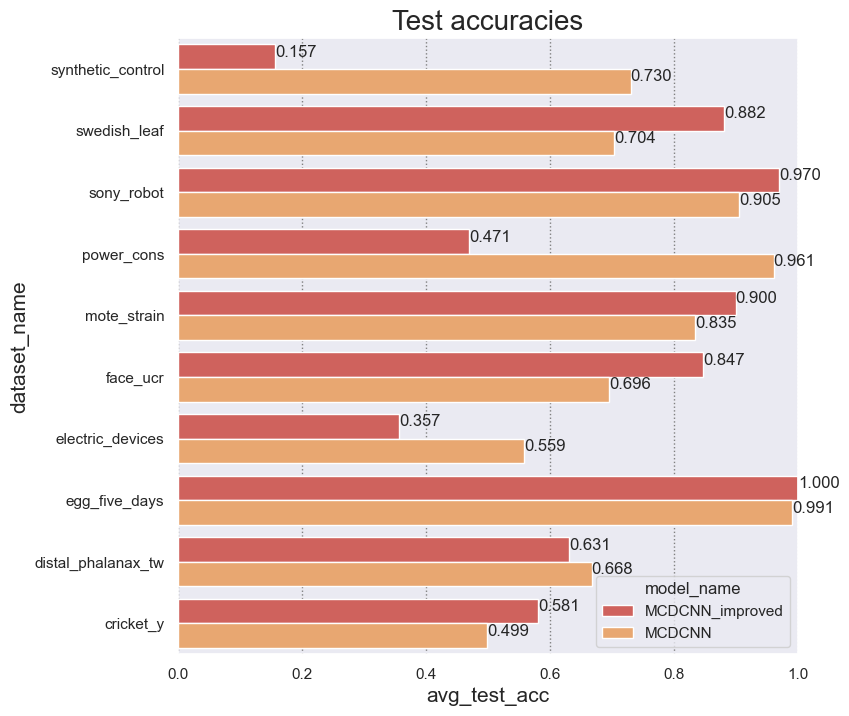

In [16]:
plot_accuracies_bar_plot_with_hue(df_ranked, title='Test accuracies', figsize=(8, 8), hue_="model_name")